In [1]:
import numpy as np
import pandas as pd
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Exploring the Data

In [2]:
#Creating Training and Testing Datasets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
#Viewing shapes of training and testing data
print("Training Data: Features Shape: {} ; Labels Shape: {}".format(X_train.shape, y_train.shape))
print("Testing Data: Features Shape: {} ; Labels Shape: {}".format(X_test.shape, y_test.shape))

Training Data: Features Shape: (60000, 28, 28) ; Labels Shape: (60000,)
Testing Data: Features Shape: (10000, 28, 28) ; Labels Shape: (10000,)


In [4]:
#Viewing the data type of the features and labels
print("Dtype for Features: {} ; Dtype for Labels: {}".format(X_train.dtype, y_train.dtype))

Dtype for Features: uint8 ; Dtype for Labels: uint8


In [5]:
#Normalizing intensities of the features to range (0 - 1)
X_valid, X_train = X_train[:5000] / 255, X_train[5000:] / 255
y_valid, y_train = y_train[:5000], y_train[5000:]

In [6]:
#Viewing the shape for training and validation set
print("Training Data: Features Shape: {} ; Labels Shape: {}".format(X_train.shape, y_train.shape))
print("Validation Data: Features Shape: {} ; Labels Shape: {}".format(X_valid.shape, y_valid.shape))

Training Data: Features Shape: (55000, 28, 28) ; Labels Shape: (55000,)
Validation Data: Features Shape: (5000, 28, 28) ; Labels Shape: (5000,)


In [7]:
#Defining the class labels for the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] 

In [8]:
#Now viewing the class_names based on the training label values
class_names[y_train[0].astype(np.int32)] #Viewing the first image in the training dataset

'Coat'

# Creating MLP Model using Keras Sequential API 

In [9]:
#Creating our own MLP model using Sequential API
model = Sequential() #Creating a sequential stack neural network model
model.add(Flatten(input_shape=[28,28])) #Creating a Flatten layer that preprocesses inputs to 1D array 
model.add(Dense(300, activation="relu")) #Creating a Dense layer as first hidden layer with 300 neurons
model.add(Dense(100, activation="relu")) #Creating a Dense layer as second hidden layer with 100 neurons
model.add(Dense(10, activation="softmax")) #Creating a Dense layer as output layer with 10 neurons (each representing a class)

In [10]:
#Viewing the description of model's layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Viewing the model layers
model.layers

In [12]:
#Viewing the name of the first hidden layer
hidden_layer1 = model.layers[1]
hidden_layer1.name

'dense'

In [13]:
#Viewing the weights and biases for this hidden layer
weights, biases = hidden_layer1.get_weights()

In [14]:
weights

array([[ 0.07243937, -0.06711394,  0.01761894, ..., -0.01605434,
         0.05518845,  0.00218089],
       [ 0.04343167, -0.0196126 , -0.07260251, ..., -0.03739005,
         0.06758003,  0.01458481],
       [ 0.05095319, -0.05440888, -0.07153256, ...,  0.04649866,
         0.01066992,  0.04440138],
       ...,
       [ 0.07359445,  0.04785643,  0.02713349, ..., -0.039954  ,
         0.02972297, -0.01404875],
       [ 0.0203619 ,  0.06998949, -0.02929178, ...,  0.06152321,
         0.03768665,  0.04026607],
       [-0.03110271,  0.00345067,  0.0105897 , ..., -0.06669217,
        -0.02972249, -0.07213339]], dtype=float32)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
#Viewing shapes for weights and biases
print("Weights Shape: {} ; Biases Shape: {}".format(weights.shape, biases.shape))

Weights Shape: (784, 300) ; Biases Shape: (300,)


## Compiling the Model

In [17]:
#Compiling the created model
model.compile(loss = "sparse_categorical_crossentropy", #Using because of sparse class categories as labels
              optimizer = "sgd",  #Using Backpropogation algorithm with SGD for optimization (default eta = 0.01)
              metrics = ["accuracy"]) #Using Accuracy as a model metric 

# Training the Model

In [18]:
#Using the fit method to train the model with training dataset
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.9812 - accuracy: 0.6888 - val_loss: 0.5131 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5006 - accuracy: 0.8292 - val_loss: 0.4433 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4538 - accuracy: 0.8408 - val_loss: 0.4179 - val_accuracy: 0.8530
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4156 - accuracy: 0.8529 - val_loss: 0.4140 - val_accuracy: 0.8554
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4018 - accuracy: 0.8566 - val_loss: 0.3755 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3842 - accuracy: 0.8645 - val_loss: 0.3679 - val_accuracy: 0.8730
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3662 - accuracy: 0.8697 - val_loss: 0.3878 - val_accuracy:

In [19]:
#Viewing the parameters for the obtained model
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [20]:
#Viewing the epochs for the obtained model
len(history.epoch)

30

## Plotting Learning Curves for the Model

In [21]:
#Using pandas to convert obtained loss and extra metrics dictionary to dataframe
history_df = pd.DataFrame(history.history)

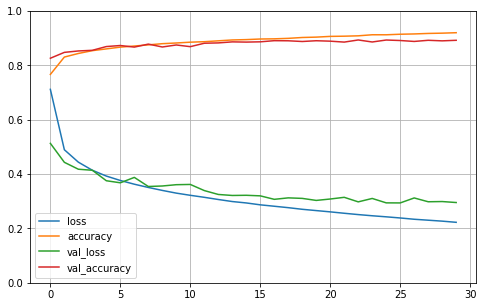

In [22]:
#Plotting a graph for learning curve using obtained dataframe
history_df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluating the Model

In [23]:
#Evaluating the model for the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.4230 - accuracy: 0.8441


[66.4229965209961, 0.8440999984741211]

# Predicting Labels using Trained Model

In [24]:
#Creating instances from the test set
X_new = X_test[:3]

In [25]:
#Computing label probabilities for the new set
y_proba = model.predict(X_new)

In [26]:
#Viewing the probabilities obtained
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
#Now viewing the classes predicted by model directly
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [33]:
#Viewing class names for the predicted labels
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [34]:
#Viewing whether the classifier correctly identified the images
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)